In [67]:
import pandas as pd

In [68]:
df = pd.read_csv('data.csv')
df.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [69]:
# # Coverting Male/Female to 0/1
# for i in range(df.shape[0]):
#     if df.loc[i,'Gender'] == "Male":
#         df.loc[i,'Gender'] = 0
#     else:
#         df.loc[i,'Gender'] = 1
# df.head()

In [70]:
x = df.drop(['Personality','Gender','Age'], axis=1)
y = df['Personality']

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [78]:
x_train.head()

,openness,neuroticism,conscientiousness,agreeableness,extraversion
504,7,4,6,5,6
876,7,7,2,5,7
140,7,7,6,6,4
688,5,4,4,4,5
772,5,5,4,2,7


In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy = []
k_val = []

print("K Accuracy")

for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    k_val.append(i)
    accuracy.append(accuracy_score(y_test, y_pred)*200)
    print(k_val[i-1],accuracy[i-1])

K Accuracy
1 61.71875
2 61.71875
3 55.46875
4 55.46875
5 58.59375
6 53.125
7 57.8125
8 55.46875
9 61.71875
10 61.71875
11 59.375
12 61.71875
13 57.03125
14 56.25
15 57.03125
16 61.71875
17 61.71875
18 64.0625
19 63.28125
20 63.28125
21 65.625
22 67.96875
23 65.625
24 61.71875
25 63.28125
26 61.71875
27 61.71875
28 63.28125
29 61.71875
30 64.0625
31 63.28125
32 67.96875
33 67.96875
34 71.875
35 68.75
36 71.09375
37 67.96875
38 71.09375
39 67.96875
40 67.96875


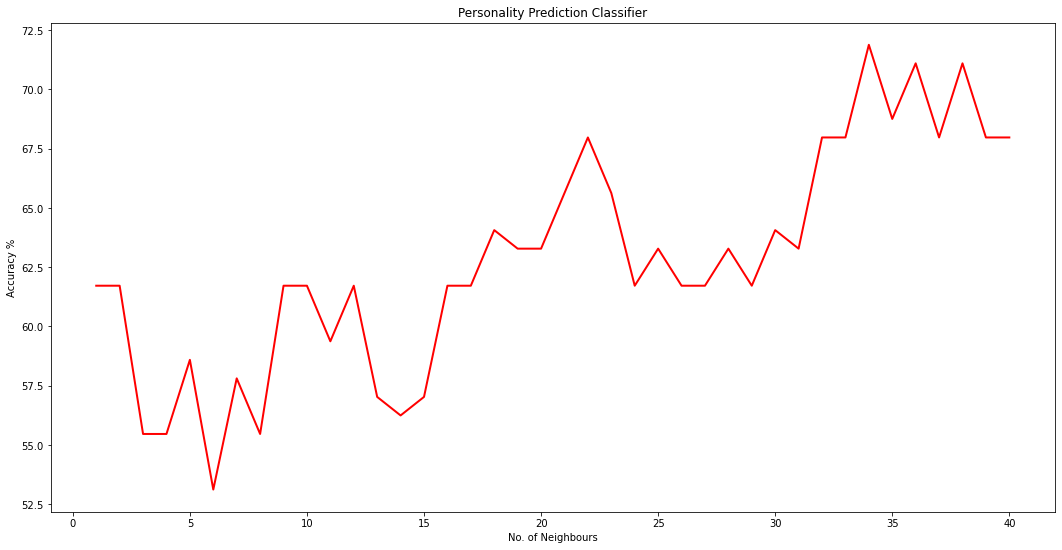

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 9))
plt.title('Personality Prediction Classifier')
plt.xlabel('No. of Neighbours')
plt.ylabel('Accuracy %')
plt.plot(k_val,accuracy,color='red',linewidth=2)